## Load the Data

In [1]:
import pandas as pd 
import os

# function to load data
def load_data(data_path, file_name):
    csv_path = os.path.join(data_path, file_name)
    return pd.read_csv(csv_path, low_memory=False)

ocean = load_data("data", "Data_Level5_BAH_OceanCleanup.csv")
ocean.head()

,Cleanup ID,Zone,State,Country,GPS,Cleanup Type,Cleanup Date,Group Name,Adults,Children,...,Other Trash (Clean Swell),Condoms,Diapers,Syringes,Tampons/Tampon Applicators,Personal Hygiene (Clean Swell),Foam Pieces,Glass Pieces,Plastic Pieces,Total Items Collected
0,86,"Cuyahoga County, OH, USA","Ohio, USA",United States,"41.49742, -81.56505","Land (beach, shoreline and inland)",12/22/2014,NaN,1.0,0.0,...,0,0,0,0,0,0,0,0,0,3.0
1,87,"Fairfax County, VA, USA","Virginia, USA",United States,"38.87456, -77.24428","Land (beach, shoreline and inland)",12/24/2014,NaN,1.0,0.0,...,0,0,0,0,0,0,0,0,2,10.0
2,92,"Washington, DC, USA","District of Columbia, USA",United States,"38.90733, -77.04405","Land (beach, shoreline and inland)",2/19/2015,NaN,1.0,0.0,...,1,0,0,0,0,0,0,0,0,4.0
3,93,"Washington, DC, USA","District of Columbia, USA",United States,"38.90733, -77.0441","Land (beach, shoreline and inland)",2/19/2015,NaN,1.0,0.0,...,0,0,0,0,0,0,0,0,0,14.0
4,94,"Washington, DC, USA","District of Columbia, USA",United States,"38.90733, -77.0441","Land (beach, shoreline and inland)",2/19/2015,NaN,1.0,0.0,...,0,0,0,0,0,0,0,0,0,14.0


In [2]:
ocean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37904 entries, 0 to 37903
Data columns (total 61 columns):
Cleanup ID                                   37904 non-null object
Zone                                         37665 non-null object
State                                        37577 non-null object
Country                                      37903 non-null object
GPS                                          37903 non-null object
Cleanup Type                                 37903 non-null object
Cleanup Date                                 37903 non-null object
Group Name                                   26636 non-null object
Adults                                       37903 non-null float64
Children                                     37903 non-null float64
People                                       37903 non-null float64
Pounds                                       37903 non-null float64
Miles                                        37903 non-null float64
# of bags      

## Discover the Data

In [3]:
total_collected = ocean['Total Items Collected'].sum(axis = 0, skipna = True)
total_collected

19051840.0

In [4]:
numerical = ocean.select_dtypes(include='int64')

In [5]:
total_numerical = numerical.sum(axis = 0, skipna = True) 
total_numerical.keys()

Index(['Cigarette Butts', 'Food Wrappers (candy, chips, etc.)',
       'Take Out/Away Containers (Plastic)', 'Take Out/Away Containers (Foam)',
       'Bottle Caps (Plastic)', 'Bottle Caps (Metal)', 'Lids (Plastic)',
       'Straws, Stirrers', 'Forks, Knives, Spoons',
       'Beverage Bottles (Plastic)', 'Beverage Bottles (Glass)',
       'Beverage Cans', 'Grocery Bags (Plastic)', 'Other Plastic Bags',
       'Paper Bags', 'Cups, Plates (Paper)', 'Cups, Plates (Plastic)',
       'Cups, Plates (Foam)', 'Fishing Buoys, Pots & Traps',
       'Fishing Net & Pieces', 'Fishing Line (1 yard/meter = 1 piece)',
       'Rope (1 yard/meter = 1 piece)', 'Fishing Gear (Clean Swell)',
       '6-Pack Holders', 'Other Plastic/Foam Packaging',
       'Other Plastic Bottles (oil, bleach, etc.)', 'Strapping Bands',
       'Tobacco Packaging/Wrap', 'Other Packaging (Clean Swell)',
       'Appliances (refrigerators, washers, etc.)', 'Balloons', 'Cigar Tips',
       'Cigarette Lighters', 'Construction Mater

In [6]:
numerical_percentage = []
for i in range(len(total_numerical)):
    p_ =  (total_numerical.iloc[i] * 100) / total_collected
    numerical_percentage.append(p_)

In [7]:
keys = list(total_numerical.keys())
keys[0]

'Cigarette Butts'

In [8]:
percentage_map = dict()

for i in range(len(numerical_percentage)):
    percentage_map[keys[i]] = numerical_percentage[i]
percentage_map

{'Cigarette Butts': 34.81041201269799,
 'Food Wrappers (candy, chips, etc.)': 13.169331676100576,
 'Take Out/Away Containers (Plastic)': 2.353966860943615,
 'Take Out/Away Containers (Foam)': 1.7270247913062466,
 'Bottle Caps (Plastic)': 11.578325243126123,
 'Bottle Caps (Metal)': 3.2515494566404084,
 'Lids (Plastic)': 2.9248723482876193,
 'Straws, Stirrers': 5.538709122058552,
 'Forks, Knives, Spoons': 1.8996590355577203,
 'Beverage Bottles (Plastic)': 8.528824512488033,
 'Beverage Bottles (Glass)': 3.9448683171809127,
 'Beverage Cans': 5.246653341619497,
 'Grocery Bags (Plastic)': 3.729340578127887,
 'Other Plastic Bags': 2.7134491996573558,
 'Paper Bags': 1.0472584275324588,
 'Cups, Plates (Paper)': 1.2320384802727715,
 'Cups, Plates (Plastic)': 2.1850592908611453,
 'Cups, Plates (Foam)': 1.5547999563296773,
 'Fishing Buoys, Pots & Traps': 0.3309496615549994,
 'Fishing Net & Pieces': 0.4880893394023884,
 'Fishing Line (1 yard/meter = 1 piece)': 1.2402266657708652,
 'Rope (1 yard/met

In [9]:
{k: v for k, v in sorted(percentage_map.items(), key=lambda item: item[1])}

{'Appliances (refrigerators, washers, etc.)': 0.07282236256445572,
 'Syringes': 0.11906461528125367,
 'Diapers': 0.1514709340410165,
 'Condoms': 0.16089784503753968,
 '6-Pack Holders': 0.23807674219392982,
 'Tampons/Tampon Applicators': 0.2696327493827368,
 'Fishing Buoys, Pots & Traps': 0.3309496615549994,
 'Cigarette Lighters': 0.3779267514318827,
 'Tires': 0.3999193778658649,
 'Personal Hygiene (Clean Swell)': 0.42532374825738617,
 'Fishing Net & Pieces': 0.4880893394023884,
 'Fireworks': 0.49420948317852764,
 'Toys': 0.524463778826612,
 'Fishing Gear (Clean Swell)': 0.5626018274350404,
 'Strapping Bands': 0.6151531820548567,
 'Other Plastic Bottles (oil, bleach, etc.)': 0.7488935451903858,
 'Balloons': 0.9530628012832356,
 'Other Packaging (Clean Swell)': 0.9642743168113946,
 'Tobacco Packaging/Wrap': 1.0026538119152795,
 'Rope (1 yard/meter = 1 piece)': 1.0114088717940104,
 'Paper Bags': 1.0472584275324588,
 'Cups, Plates (Paper)': 1.2320384802727715,
 'Fishing Line (1 yard/meter 

In [10]:
percentages_df = pd.DataFrame(percentage_map, index=[0])

In [11]:
total_adults = ocean['Adults'].sum(axis = 0, skipna = True) 
total_children = ocean['Children'].sum(axis = 0, skipna = True) 
total_people = ocean['People'].sum(axis = 0, skipna = True) 
total_pounds = ocean['Pounds'].sum(axis = 0, skipna = True)
total_miles = ocean['Miles'].sum(axis = 0, skipna = True)
state_count = len(ocean['State'].unique())
zone_count = len(ocean['Zone'].unique())

In [12]:
print("Number of adults participated: " + '{:,}'.format(total_adults))
print("Number of children participated: " + '{:,}'.format(total_children))
print("Number of people participated: " + '{:,}'.format(total_people))
print("Total pounds collected: " + '{:,}'.format(total_pounds) +" lbs")
print("Total miles covered: " + '{:,}'.format(total_miles))
print("Number of states joined: " + '{:,}'.format(state_count))
print("Number of zones joined: " + '{:,}'.format(zone_count))

Number of adults participated: 630,004.0
Number of children participated: 92,969.0
Number of people participated: 722,973.0
Total pounds collected: 11,780,214.857647093 lbs
Total miles covered: 54,063.579850974
Number of states joined: 54
Number of zones joined: 901


In [13]:
ocean.describe()

,Adults,Children,People,Pounds,Miles,# of bags,Cigarette Butts,"Food Wrappers (candy, chips, etc.)",Take Out/Away Containers (Plastic),Take Out/Away Containers (Foam),...,Other Trash (Clean Swell),Condoms,Diapers,Syringes,Tampons/Tampon Applicators,Personal Hygiene (Clean Swell),Foam Pieces,Glass Pieces,Plastic Pieces,Total Items Collected
count,37903.000000,37903.000000,37903.000000,37903.000000,37903.000000,37903.000000,3.790400e+04,3.790400e+04,37904.000000,37904.000000,...,37904.000000,37904.000000,37904.000000,37904.000000,37904.000000,37904.000000,3.790400e+04,37904.000000,3.790400e+04,37903.000000
mean,16.621481,2.452814,19.074295,310.799010,1.426367,7.360103,1.749690e+02,6.619354e+01,11.831838,8.680614,...,18.597932,0.808727,0.761344,0.598459,1.355266,2.137822,1.737178e+02,28.649694,1.579318e+02,502.647284
std,200.761902,18.684501,203.218661,4621.795387,15.329109,157.094929,1.704443e+04,6.445898e+03,1153.418164,846.008907,...,1810.697419,78.887605,74.457778,58.585591,132.347617,208.136822,1.719248e+04,2792.134959,1.539350e+04,4060.754999
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,1.000000,0.000000,1.000000,1.450000,0.027500,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,19.000000
50%,2.000000,0.000000,2.000000,5.600000,0.341700,0.000000,4.000000e+00,5.000000e+00,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,8.000000e+00,84.000000
75%,6.000000,0.000000,7.000000,24.000000,1.105100,0.000000,3.000000e+01,1.900000e+01,3.000000,2.000000,...,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,4.300000e+01,264.000000
max,22060.000000,1291.000000,22060.000000,425025.000000,2423.166700,18581.000000,3.316012e+06,1.254500e+06,224237.000000,164515.000000,...,352468.000000,15327.000000,14429.000000,11342.000000,25685.000000,40516.000000,3.292299e+06,542969.000000,2.993124e+06,440496.000000


Take a look at categorical data:

In [14]:
ocean['Zone'].value_counts()

Los Angeles County, CA, USA    2499
Palm Beach County, FL, USA     2218
San Diego County, CA, USA      1852
Pinellas County, FL, USA       1757
Miami-Dade County, FL, USA     1650
                               ... 
Runnels County, TX, USA           1
Warren County, NJ, USA            1
Wilkinson County, GA, USA         1
Lanier County, GA, USA            1
Bannock County, ID, USA           1
Name: Zone, Length: 900, dtype: int64

In [15]:
ocean['State'].value_counts()

Florida, USA                 11319
California, USA               9271
North Carolina, USA           1800
Washington, USA               1233
New York, USA                 1179
South Carolina, USA           1168
Texas, USA                    1070
Virginia, USA                 1068
Oregon, USA                    936
Hawaii, USA                    749
Massachusetts, USA             616
Pennsylvania, USA              596
Ohio, USA                      499
Rhode Island, USA              499
Illinois, USA                  482
New Jersey, USA                472
Maryland, USA                  467
Michigan, USA                  442
Connecticut, USA               407
Maine, USA                     398
District of Columbia, USA      371
Louisiana, USA                 363
Georgia, USA                   345
Delaware, USA                  331
Wisconsin, USA                 297
Alabama, USA                   197
Alaska, USA                    163
Colorado, USA                  132
New Hampshire, USA  

In [16]:
ocean['Country'].value_counts()

United States    37903
Name: Country, dtype: int64

In [17]:
ocean['Cleanup Type'].value_counts()

Land (beach, shoreline and inland)                  37116
Watercraft (powerboat, sailboat, kayak or canoe)      571
Underwater                                            216
Name: Cleanup Type, dtype: int64

In [18]:
ocean['Group Name'].value_counts()

SOLVE                                                            666
Sea Turtle Trackers                                              372
EBSP Turtle Patrol                                               371
Sea turtle trackers                                              356
I am Green eco servicesc gno v                                   186
                                                                ... 
MA-CZM W. O'Connell                                                1
CVW-Fairfax(E.C.LawrencePark)Halbert/YoungMen'sService League      1
West Olcott Beach - Collins                                        1
Michaela P                                                         1
Redondo Beach Harbor                                               1
Name: Group Name, Length: 12973, dtype: int64

Look at corelations between data:

In [14]:
import numpy as np

ocean[['gps_y','gps_x']] = ocean.GPS.str.split(expand=True)
ocean[['gps_y']] = ocean['gps_y'].str.slice(0, -1)
ocean[['gps_y', 'gps_x']] = ocean[['gps_y', 'gps_x']].astype('float')
ocean.head(1)

,Cleanup ID,Zone,State,Country,GPS,Cleanup Type,Cleanup Date,Group Name,Adults,Children,...,Diapers,Syringes,Tampons/Tampon Applicators,Personal Hygiene (Clean Swell),Foam Pieces,Glass Pieces,Plastic Pieces,Total Items Collected,gps_y,gps_x
0,86,"Cuyahoga County, OH, USA","Ohio, USA",United States,"41.49742, -81.56505","Land (beach, shoreline and inland)",12/22/2014,NaN,1.0,0.0,...,0,0,0,0,0,0,0,3.0,41.49742,-81.56505


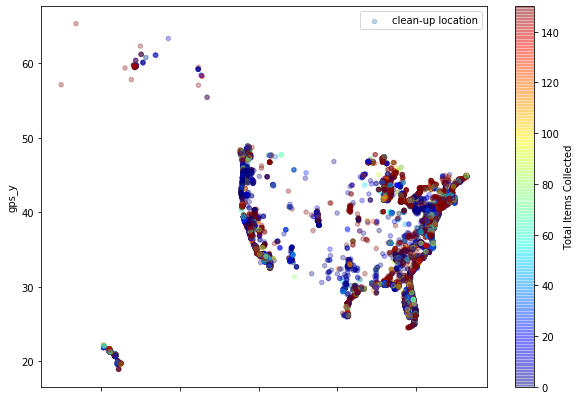

In [21]:
# plot within jupyter
%matplotlib inline 
import matplotlib.pyplot as plt

ocean.plot(kind="scatter", x="gps_x", y="gps_y", alpha=0.3,
            label="clean-up location", figsize=(10,7),
            c="Total Items Collected", cmap=plt.get_cmap("jet"), colorbar=True, vmax=150)
plt.legend()
plt.savefig("plots/items_collected_scatter_plot.png")
plt.show()

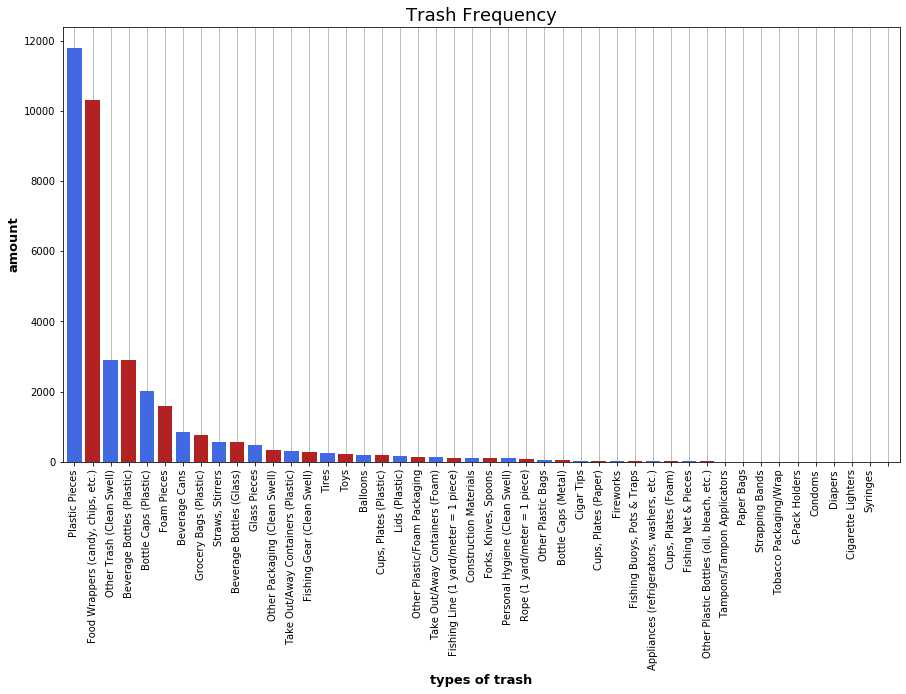

In [22]:
trash_types = ocean.loc[:, 'Cigarette Butts':'Plastic Pieces']  # isolate trash types
trash_types['Max'] = trash_types.loc[:].idxmax(axis=1)  # find most frequent trash item

cl_df = ocean.drop(ocean.loc[:,'Cigarette Butts':'Plastic Pieces'].head(0).columns, axis=1)  # separate trash classifier df
cl_df['most_freq_trash'] = trash_types['Max']

cl_df.head()
cl_df['most_freq_trash'].value_counts()

# horizantal bar plot - stacked
ax = cl_df['most_freq_trash'].value_counts().plot.bar(stacked=True, figsize=(15,8), width=0.8, color=['royalblue','firebrick'], grid=True)

# grid settings
ax.set_axisbelow(True)
ax.grid(axis='y')

# labels and title
ax.set_xlabel('types of trash', fontname='DejaVu Sans', fontsize=13, weight='bold')
ax.set_ylabel('amount', fontname='DejaVu Sans', fontsize=13, weight='bold')
ax.set_title("Trash Frequency", fontname='DejaVu Sans', fontsize=18)

# x axis tick frequency
ax.xaxis.set_major_locator(plt.MultipleLocator(1))

# save the figure
fig = ax.get_figure()
fig.savefig("plots/trash_type_frequency.png")
fig.show()

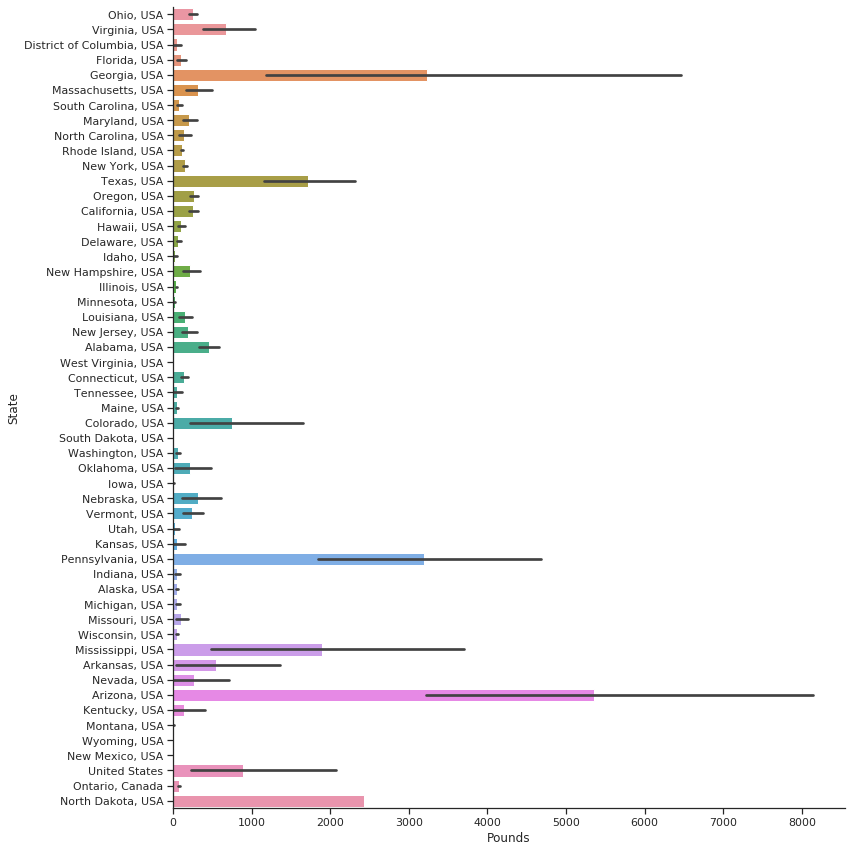

In [32]:
import seaborn as sns
sns.set(style="ticks", color_codes=True) #sns setting


plt = sns.catplot(x="Pounds", 
            y="State", 
            kind="bar",
            data=ocean,
            size=12);
plt.savefig("plots/pounds_per_state.png")
plt

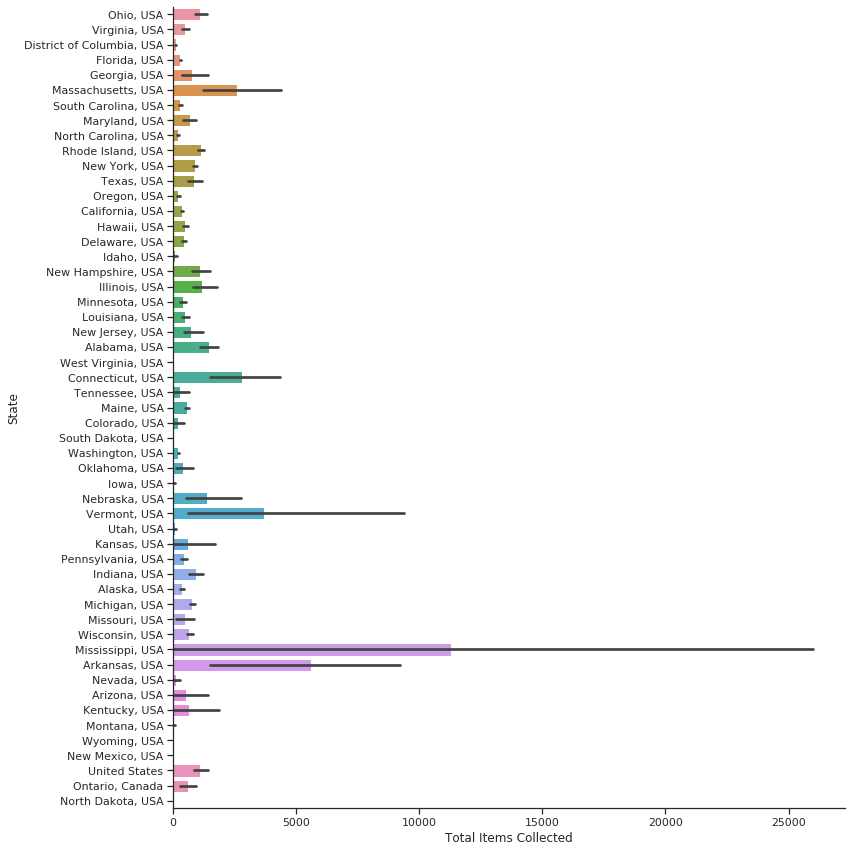

In [33]:
sns.set(style="ticks", color_codes=True) #sns setting

plt = sns.catplot(x="Total Items Collected", 
            y="State", 
            kind="bar",
            data=ocean,
            size=12);
plt.savefig("plots/pieces_per_state.png")
plt

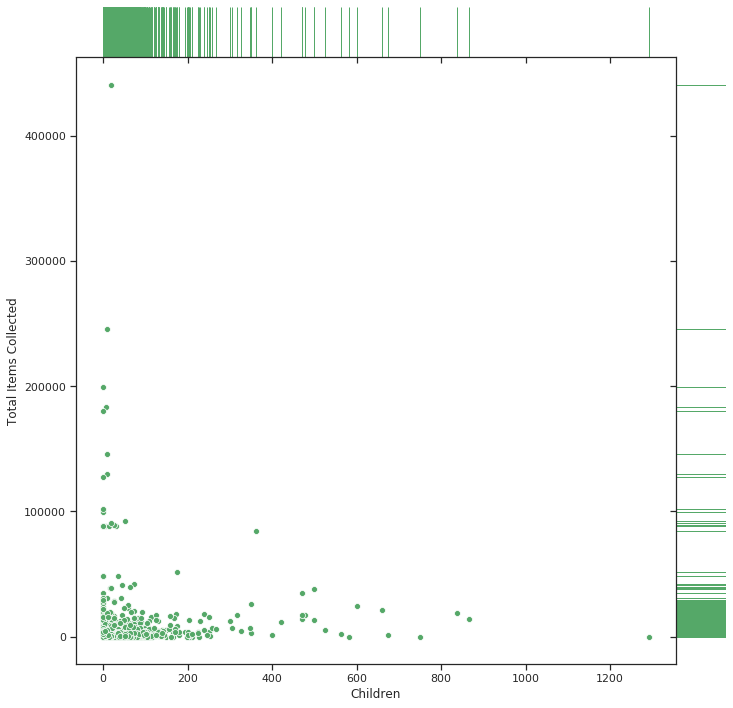

In [34]:
sns.set(style="ticks", color_codes=True) #sns setting

grid = sns.JointGrid(x="Children", y="Total Items Collected", 
                     space=0, height=6, ratio=12, size=10,
                     data=ocean)
grid.plot_joint(sns.scatterplot, color="g")
grid.plot_marginals(sns.rugplot, height=1, color="g")

grid.savefig("plots/pieces_per_state.png")
grid

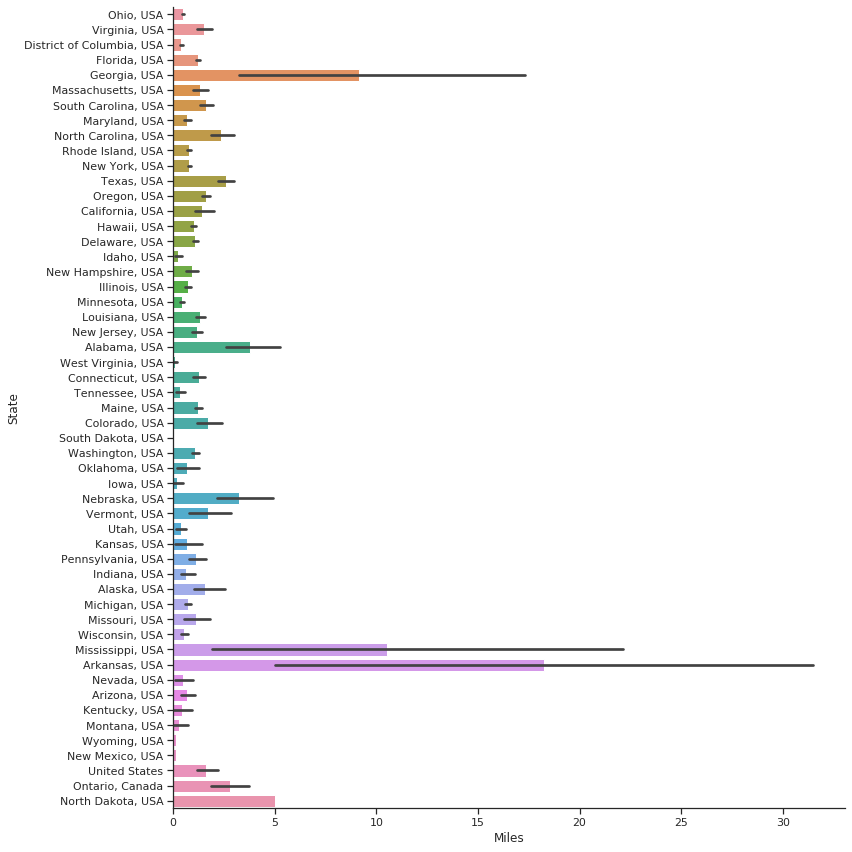

In [35]:
sns.set(style="ticks", color_codes=True) #sns setting

plt = sns.catplot(x="Miles", 
            y="State", 
            kind="bar",
            data=ocean,
            size=12);
plt.savefig("plots/miles_covered_per_state.png")
plt

## Interactive Map

In [15]:
ocean.nlargest(10, ['Pounds'])['Pounds']

28753    425025.0
24015    300656.0
15246    262500.0
15358    258470.0
5873     156000.0
7177     137840.0
27557    124000.0
5868     120000.0
7261     117552.0
27584    116500.0
Name: Pounds, dtype: float64

In [16]:
# take out 'usa' from state information
ocean[['State']] = ocean['State'].str.slice(0, -5)

In [17]:
ocean.dropna(subset=['gps_x'], inplace=True)
ocean.dropna(subset=['gps_y'], inplace=True)

In [18]:
# Change format of 'date' from mm/dd/yyyy to yyyy and rename to 'year' 
ocean['Cleanup Date_2'] = ocean['Cleanup Date'].str.split('/', n = 2, expand=False)
ocean['year'] = ocean['Cleanup Date_2'].str[2].astype('float')

ocean = ocean[ocean['year'] > 2014]
ocean = ocean[ocean['year'] < 2020]

In [19]:
ocean['Pounds'].describe()

count     37700.000000
mean        309.689288
std        4605.642345
min           0.000000
25%           1.440000
50%           5.550000
75%          24.000000
max      425025.000000
Name: Pounds, dtype: float64

In [20]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

norm = matplotlib.colors.Normalize(vmin=0, vmax=50, clip=True)
mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.winter) # winter, rainbow

ocean['color'] = ocean['Pounds'].apply(lambda x: mapper.to_rgba(x))

In [21]:
ocean['color'] = ocean['color'].apply(matplotlib.colors.to_hex)

In [22]:
ocean['color'].value_counts()

#00ff80    6949
#0000ff    3938
#0001fe    1139
#0005fc     931
#0003fe     916
           ... 
#00e08f       2
#00ee88       2
#00fb82       2
#00e48d       2
#00ec89       1
Name: color, Length: 255, dtype: int64

Look at the outliers in the Pounds attribute:

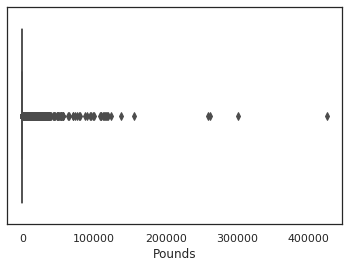

In [96]:
import seaborn as sns
sns.boxplot(x=ocean['Pounds'])

In [23]:
radius_map = []

for i in range(0,len(ocean)):
    r = ocean.iloc[i]['People'] / 100.0
    if (r > 7.0):
        r = 7.0
    if (r <= 3.0):
        r = 3.0
    radius_map.append(r)

ocean['radius'] = radius_map 

In [31]:
features = [
    {
        'type': 'Feature',
        'geometry': {
            'type': 'Point',
            'coordinates': [ocean.iloc[i]['gps_x'], ocean.iloc[i]['gps_y']],
        },
        'properties': {
            'popup': "<h5>" + str(ocean.iloc[i]['Zone']) + "</h5><br>" +
                       "<p><b>Group Name: </b>" + str(ocean.iloc[i]['Group Name']) + "</p>" +
                       "<p><b>Cleanup Date: </b>" + str(ocean.iloc[i]['Cleanup Date']) + "</p>" +
                       "<p><b>Pounds Collected: </b>" + str(ocean.iloc[i]['Pounds']) + "</p>" +
                       "<p><b>People Participated: </b>" + str(int(ocean.iloc[i]['People'])) + "</p>" + 
                       "<p><b>Trash Count Per Mile: </b>" + str(ocean.iloc[i]['Total Items Collected'] / ocean.iloc[i]['Miles']) + "</p>",
            'time': ocean.iloc[i]['Cleanup Date'],
            'icon': 'circle',
            'iconstyle': {
                'fillColor': str(ocean.iloc[i]['color']),
                'color': str(ocean.iloc[i]['color']),
                'fillOpacity': 0.5,
                'stroke': 'false',
                'fill':True,
                'radius': float(ocean.iloc[i]['radius']),
                'weight':0.5,
            },
            'style': {'weight': 0.5},
            'id': 'man'
        }
    } for i in range(0,len(ocean))
]

/home/maksim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in double_scalars
/home/maksim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


In [48]:
import branca


legend_html = '''
{% macro html(this, kwargs) %}
<div style="
    position: fixed; 
    bottom: 50px;
    left: 50px;
    width: 250px;
    height: 80px;
    z-index:9999;
    font-size:14px;
    ">
    <p><a style="color:#e6194b;font-size:150%;margin-left:20px;">◼</a>&emsp;12385 people have participated</p>
    <p><a style="color:#19e6b4;font-size:150%;margin-left:20px;">◼</a>&emsp;123141 location in the USA</p>
    <p><a style="color:#e6194b;font-size:150%;margin-left:20px;">◼</a>&emsp;1231123lbs trash removed</p>
    <p><a style="color:#19e6b4;font-size:150%;margin-left:20px;">◼</a>&emsp;123121 miles covered</p>
</div>
<div style="
    position: fixed; 
    bottom: 50px;
    left: 50px;
    width: 150px;
    height: 80px; 
    z-index:9998;
    font-size:14px;
    background-color: #ffffff;
    filter: blur(8px);
    -webkit-filter: blur(8px);
    opacity: 0.7;
    ">
</div>
{% endmacro %}
'''

legend = branca.element.MacroElement()
legend._template = branca.element.Template(legend_html)

In [50]:
# import the library
import folium
import pandas as pd
from folium import plugins
from folium.plugins import MiniMap
from folium.plugins import MeasureControl
from folium.plugins import FloatImage
 
# Make an empty map, cartodbdark_matter , stamenterrain
map_ = folium.Map(location=[37, -102],
            max_bounds=True,
            tiles="cartodbdark_matter", 
            zoom_start=4,
            max_zoom=6, 
            min_zoom=3)



folium.plugins.TimestampedGeoJson(
            {
                'type': 'FeatureCollection',
                'features': features
            },
            period='P1D',
            add_last_point=True,
            auto_play=False,
            loop=True,
            max_speed=5,
            min_speed=1,
            loop_button=True,
            date_options='MM/DD/YYYY',
            time_slider_drag_update=True,
            duration='P1M').add_to(map_)


url = ('https://raw.githubusercontent.com/SECOORA/static_assets/'
       'master/maps/img/rose.png')
#FloatImage(url, bottom=40, left=65).add_to(map_)
#map_.add_child(MeasureControl())
#map_.get_root().add_child(legend)


map_.save("maps/time_lapse.html")
#map_

In [30]:
import folium
import branca
import json
import requests


url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
county_data = f'{url}/us_county_data.csv'
county_geo = f'{url}/us_counties_20m_topo.json'


df = pd.read_csv(county_data, na_values=[' '])
fips_codes = df[['FIPS_Code', 'Area_name']]


In [31]:
county = []
for i in range(0,len(ocean)):
    c_ =  str(ocean.iloc[i]['Zone']).split(",")[0]
    county.append(c_)
len(county)

37700

In [32]:
fips_map = dict()
count = 0
for i in county:
    try:
        code_index = np.where(fips_codes["Area_name"]==i)[0][0]
        code = fips_codes.iloc[code_index]['FIPS_Code']
        
        if code in fips_map:
            fips_map[code] = fips_map[i] + ocean.iloc[count]['Pounds']
        else:
            fips_map[code] = ocean.iloc[count]['Pounds']
    except Exception as e:
        count += 1
        pass
    count += 1
len(fips_map.values())    

560

In [33]:
ocean_fips = pd.DataFrame(fips_map.items(), columns=['FIPS', 'POUNDS_TOTAL'])
ocean_fips

,FIPS,POUNDS_TOTAL
0,53000,0.63
1,12103,0.90
2,12057,0.89
3,1067,0.68
4,25009,6.81
...,...,...
555,4025,3.98
556,4009,0.73
557,16005,4.06
558,55057,1.11


In [157]:
colorscale = branca.colormap.linear.PuRd_09.scale(0, 50)
ocean_series = ocean_fips.set_index('FIPS')['POUNDS_TOTAL']
ocean_series.dropna(inplace=True)

def style_function(feature):
    p = ocean_series.get(int(feature['id'][-5:]), None)
    return {
        'fillOpacity': 0.9,
        'weight': 0.09,
        'fillColor': '#black' if p is None else colorscale(p)
    }

map_ = folium.Map(
    location=[48, -102],
    max_bounds=True,
    tiles="cartodbdark_matter", 
    zoom_start=4,
    max_zoom=6, 
    min_zoom=3
)

folium.TopoJson(
    json.loads(requests.get(county_geo).text),
    'objects.us_counties_20m',
    style_function=style_function
).add_to(map_)

map_.save("maps/heat_map.html")
map_

## Look for Corelations

In [100]:
# drop unneeded attribute
ocean.drop(["Country", "gps_y", "gps_x", "year", "radius", "FIPS_Code"],
            axis=1,
            inplace=True)

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imgkit
from pyvirtualdisplay import Display

display = Display(visible=0, size=(800,600))
display.start()

corr = ocean.corr()
corr_plt = corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

html = corr_plt.render()
imgkit.from_string(html, 'plots/corr_table.png')

corr_plt

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


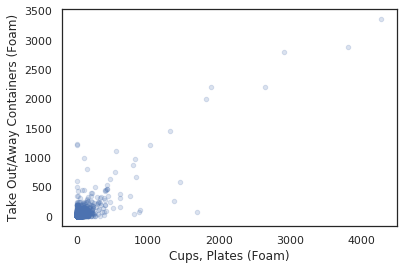

In [102]:
ocean.plot(kind="scatter", x="Cups, Plates (Foam)", y="Take Out/Away Containers (Foam)", alpha=0.2)

## Explore Combination of Different Datasets

In [24]:
import pandas as pd 
import os

# function to load data
def load_data(data_path, file_name):
    csv_path = os.path.join(data_path, file_name)
    return pd.read_csv(csv_path, low_memory=False, sep=';')

debris = load_data("data", "oo_surface_debris_malaspina.csv")
debris.head()

,Latitude (º),Longitude (º),Plastic concentration (g.km-2),Vessel
0,63.57,-53.12,7.760,Pakea Bizkaia
1,60.46,-49.54,5.090,Pakea Bizkaia
2,51.15,-27.33,0.265,Pakea Bizkaia
3,49.47,-23.68,17.620,Pakea Bizkaia
4,45.58,-44.83,0.050,Pakea Bizkaia


In [25]:
debris.describe()

,Latitude (º),Longitude (º),Plastic concentration (g.km-2)
count,194.000000,194.000000,194.000000
mean,-3.897113,-37.121186,149.778273
std,29.608588,82.902909,309.890637
min,-64.880000,-179.520000,0.000000
25%,-29.990000,-87.167500,1.690000
50%,-5.265000,-36.095000,33.410000
75%,20.437500,-14.640000,102.097500
max,63.570000,179.140000,1573.470000


In [26]:
debris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 4 columns):
Latitude (º)                      194 non-null float64
Longitude (º)                     194 non-null float64
Plastic concentration (g.km-2)    194 non-null float64
Vessel                            194 non-null object
dtypes: float64(3), object(1)
memory usage: 6.2+ KB


In [27]:
# function to load data
def load_data(data_path, file_name):
    csv_path = os.path.join(data_path, file_name)
    return pd.read_csv(csv_path, low_memory=False, sep=',')

hot_spots_tempa = load_data("data", "Natural_Collection_Areas_of_Tampa_Bay_.csv")
hot_spots_tempa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 32 columns):
X             119 non-null float64
Y             119 non-null float64
FID           119 non-null int64
OBJECTID_1    119 non-null int64
OBJECTID      119 non-null int64
NAME          119 non-null object
TYPE          119 non-null object
LON           119 non-null float64
LAT           119 non-null float64
MAJOR_WATE    119 non-null object
GEO_NOTES     119 non-null object
COUNTY        119 non-null object
GNOME         119 non-null object
TB_MODEL      119 non-null object
GNOME_Y_N     119 non-null object
TB_MODEL_Y    119 non-null object
QCSURVEY      119 non-null object
QCIMAGE       119 non-null object
QC_CITIZEN    119 non-null object
OBJECTID_2    119 non-null int64
ESI           119 non-null object
LINE          119 non-null object
ENVIR         119 non-null object
MOST_SENSI    119 non-null object
LANDWARD_S    119 non-null object
SEAWARD_SH    119 non-null object
SEAWARD__1 

In [28]:
# import the library
import folium
import pandas as pd
from folium.plugins import FastMarkerCluster, MarkerCluster

# Make an empty map, cartodbdark_matter , stamenterrain
folium_map = folium.Map(location=[48, -102],
                  tiles="cartodbdark_matter",
                  zoom_start=3,
                  max_bounds=True, 
                  max_zoom = 14,
                  min_zoom=2)
mc = MarkerCluster(name="Marker Cluster")

# I can add marker one by one on the map
for i in range(0,len(ocean)):
    lbs_people=20
    if not ( ocean.iloc[i]['Pounds'] == 0 or ocean.iloc[i]['People'] == 0 ):
        lbs_people= (ocean.iloc[i]['Pounds']/ocean.iloc[i]['People']) * 5
    if lbs_people > 200:
        lbs_people = 200
    elif lbs_people < 50:
        lbs_people = 50
    folium.Circle(
      location=[ocean.iloc[i]['gps_y'], ocean.iloc[i]['gps_x']],
      popup= "<h5>" + str(ocean.iloc[i]['Zone']) + "</h5><br>" +
                       "<p><b>Group Name: </b>" + str(ocean.iloc[i]['Group Name']) + "</p>" +
                       "<p><b>Clean up type: </b>" + str(ocean.iloc[i]['Cleanup Type']) + "</p>" +
                       "<p><b>Cleanup Date: </b>" + str(ocean.iloc[i]['Cleanup Date']) + "</p>" +
                       "<p><b>Pounds Collected: </b>" + str(ocean.iloc[i]['Pounds']) + "</p>" +
                       "<p><b>People Participated: </b>" + str(int(ocean.iloc[i]['People'])) + "</p>" + 
                       "<p><b>Trash Count Per Mile: </b>" + str(ocean.iloc[i]['Total Items Collected'] / ocean.iloc[i]['Miles']) + "</p>",
                       
      radius=lbs_people,
      color='#66ff00',
      fill=True,
      fillOpacit= 0.5,
      weight=0.1,
      fill_color='#66ff00'
   ).add_to(mc)
    
# add debris data
for i in range(0,len(debris)):
    folium.Circle(
      location=[debris.iloc[i]['Latitude (º)'], debris.iloc[i]['Longitude (º)']],
      popup= "<h5>Plastic concentration</h5><p>" + str(debris.iloc[i]['Plastic concentration (g.km-2)']) + "/g.km-2</p>",
      radius= debris.iloc[i]['Plastic concentration (g.km-2)'] * 100,
      color='crimson',
      fill=True,
      fillOpacit= 0.9,
      weight=0.5,
      fill_color='crimson'
   ).add_to(folium_map)


    
# Save it as html
mc.add_to(folium_map)
#mc_sea_turtles.add_to(folium_map)
folium_map.save("maps/ocean_debris_combined_map.html")
#folium_map

/home/maksim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in double_scalars
/home/maksim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


In [31]:
print(hot_spots_tempa['X'].max())
print(hot_spots_tempa['X'].min())
print(hot_spots_tempa['Y'].max())
print(hot_spots_tempa['Y'].min())

-82.39775138150598
-82.79756336485985
28.009777530612315
27.47942988154405


In [33]:
# import the library
import folium
import pandas as pd
from folium.plugins import FastMarkerCluster, MarkerCluster

# Make an empty map, cartodbdark_matter , stamenterrain
folium_map = folium.Map(location=[25, -102],
                  tiles="cartodbdark_matter",
                  zoom_start=3,
                  max_bounds=True, 
                  max_zoom = 14,
                  min_zoom=2)
mc = MarkerCluster(name="Marker Cluster")

# I can add marker one by one on the map
for i in range(0,len(ocean)):
    lbs_people=20
    if not ( ocean.iloc[i]['Pounds'] == 0 or ocean.iloc[i]['People'] == 0 ):
        lbs_people= (ocean.iloc[i]['Pounds']/ocean.iloc[i]['People']) * 5
    if lbs_people > 200:
        lbs_people = 200
    elif lbs_people < 50:
        lbs_people = 50
    folium.Circle(
      location=[ocean.iloc[i]['gps_y'], ocean.iloc[i]['gps_x']],
      popup= "<h5>" + str(ocean.iloc[i]['Zone']) + "</h5><br>" +
                       "<p><b>Group Name: </b>" + str(ocean.iloc[i]['Group Name']) + "</p>" +
                       "<p><b>Clean up type: </b>" + str(ocean.iloc[i]['Cleanup Type']) + "</p>" +
                       "<p><b>Cleanup Date: </b>" + str(ocean.iloc[i]['Cleanup Date']) + "</p>" +
                       "<p><b>Pounds Collected: </b>" + str(ocean.iloc[i]['Pounds']) + "</p>" +
                       "<p><b>People Participated: </b>" + str(int(ocean.iloc[i]['People'])) + "</p>" + 
                       "<p><b>Trash Count Per Mile: </b>" + str(ocean.iloc[i]['Total Items Collected'] / ocean.iloc[i]['Miles']) + "</p>",
                       
      radius=lbs_people,
      color='#66ff00',
      fill=True,
      fillOpacit= 0.5,
      weight=0.1,
      fill_color='#66ff00'
   ).add_to(mc)
    
# tempa trash collection areas
for i in range(0,len(hot_spots_tempa)):
    r = 0
    if hot_spots_tempa.iloc[i]['Distance'] > 100:
        r = 100
    elif hot_spots_tempa.iloc[i]['Distance'] < 30:
        r = 30
    else:
        r = hot_spots_tempa.iloc[i]['Distance']
        
    folium.Circle(
      location=[hot_spots_tempa.iloc[i]['Y'], hot_spots_tempa.iloc[i]['X']],
      popup= "<h5> Natural Trash Collection Area </h5><p>" + hot_spots_tempa.iloc[i]['NAME'] + "</p>",
      radius= r * 10,
      color='#00E5EE',
      fill=True,
      fillOpacit= 0.9,
      weight=0.5,
      fill_color='#00E5EE'
   ).add_to(folium_map)

    
# Save it as html
mc.add_to(folium_map)
#mc_sea_turtles.add_to(folium_map)
folium_map.save("maps/tampa_bay_combined_map.html")
#folium_map

/home/maksim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in double_scalars
/home/maksim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


In [34]:
# function to load data
def load_data(data_path, file_name):
    csv_path = os.path.join(data_path, file_name)
    return pd.read_csv(csv_path, low_memory=False, sep=',')

sea_turtles = load_data("data", "pop_survey_tagging_data.csv")
sea_turtles.head()

,year,Turtle_ID,ResearchType,DateCapture,Species,Master_tag,Dead_Alive,RecordType,Inconel_Tag,BodyArea,...,Fecal,Pathogens,PCV,TS,Entangled,Imaging,OrganBiopsy,LivingTag,RadioTag,AcousticTag
0,1995,1,Misc. Tagging,16-May-95,Green,QQS241,Alive,Release,QQS241,Left Rear,...,False,False,NaN,NaN,False,False,False,False,False,False
1,1995,1,Misc. Tagging,16-May-95,Green,QQS241,Alive,Release,QQS242,Right Rear,...,False,False,NaN,NaN,False,False,False,False,False,False
2,1995,2,Misc. Tagging,24-Apr-95,Loggerhead,QQV299,Alive,Release,QQV299,Left Rear,...,False,False,NaN,NaN,False,False,False,False,False,False
3,1995,2,Misc. Tagging,24-Apr-95,Loggerhead,QQV299,Alive,Release,QQV300,Right Rear,...,False,False,NaN,NaN,False,False,False,False,False,False
4,1995,3,Misc. Tagging,12-Jun-95,Kemps_Ridley,QQV296,Alive,Release,QQV296,Left Rear,...,False,False,NaN,NaN,False,False,False,False,False,False


In [41]:
# import the library
import folium
import pandas as pd
from folium.plugins import FastMarkerCluster, MarkerCluster

# Make an empty map, cartodbdark_matter , stamenterrain
folium_map = folium.Map(location=[48, -102],
                  tiles="cartodbdark_matter",
                  zoom_start=3,
                  max_bounds=True, 
                  max_zoom = 16,
                  min_zoom=2)
mc = MarkerCluster(name="Marker Cluster") 

# I can add marker one by one on the map
for i in range(0,len(ocean)):
    lbs_people=20
    if not ( ocean.iloc[i]['Pounds'] == 0 or ocean.iloc[i]['People'] == 0 ):
        lbs_people= (ocean.iloc[i]['Pounds']/ocean.iloc[i]['People']) * 5
    if lbs_people > 200:
        lbs_people = 200
    elif lbs_people < 50:
        lbs_people = 50
    folium.Circle(
      location=[ocean.iloc[i]['gps_y'], ocean.iloc[i]['gps_x']],
      popup= "<h5>" + str(ocean.iloc[i]['Zone']) + "</h5><br>" +
                       "<p><b>Group Name: </b>" + str(ocean.iloc[i]['Group Name']) + "</p>" +
                       "<p><b>Clean up type: </b>" + str(ocean.iloc[i]['Cleanup Type']) + "</p>" +
                       "<p><b>Cleanup Date: </b>" + str(ocean.iloc[i]['Cleanup Date']) + "</p>" +
                       "<p><b>Pounds Collected: </b>" + str(ocean.iloc[i]['Pounds']) + "</p>" +
                       "<p><b>People Participated: </b>" + str(int(ocean.iloc[i]['People'])) + "</p>" + 
                       "<p><b>Trash Count Per Mile: </b>" + str(ocean.iloc[i]['Total Items Collected'] / ocean.iloc[i]['Miles']) + "</p>",
                       
      radius=lbs_people,
      color='#66ff00',
      fill=True,
      fillOpacit= 0.5,
      weight=0.1,
      fill_color='#66ff00'
   ).add_to(mc)

# sea turtles dataset
mc_sea_turtles = MarkerCluster(name="Marker Cluster Sea Turtles")
for i in range(0,len(sea_turtles)):
    if i == 800:
        break
    folium.Circle(
      location=[sea_turtles.iloc[i]['Cap_Latitude'], sea_turtles.iloc[i]['Cap_Longitude']],
      popup= "<h5>" + str(sea_turtles.iloc[i]['Species']) + "</h5><br>" +
                       "<p><b>Date Captured: </b>" + str(sea_turtles.iloc[i]['DateCapture']) + "</p>",
                       
      radius=100,
      color='crimson',
      fill=True,
      fillOpacit= 0.9,
      weight=0.9,
      fill_color='crimson'
   ).add_to(folium_map)

    
# Save it as html
mc.add_to(folium_map)
#mc_sea_turtles.add_to(folium_map)
folium_map.save("maps/sea_turtles_combined_map.html")
#folium_map

/home/maksim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in double_scalars
/home/maksim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


## Plastic Bags Carbon Footprint

> The carbon footprint of plastic (LDPE or PET, poyethylene) is about 6 kg CO2 per kg of plastic

>A plastic bag has a weight in the range of about 8 g to 60 g depending on
size and thickness. For the further calculation, it now depends on
which weight for a plastic bag you actually use. A common plastic
carrying bag in our household had a weight between 25 g and 40 g. So I
took the average of 32.5 g.

>Take the above relation between
kg plastics and kg of carbon dioxide, and you get about 200 g carbon
dioxide for 32.5 g of plastic, which is the equivalent of the average
plastic carrying bag in our household. Or in other words: For 5 plastic
bags you get 1 kg of CO2.

cite: https://timeforchange.org/plastic-bags-and-plastic-bottles-co2-emissions-during-their-lifetime/

In [40]:
total_bags = ocean['Grocery Bags (Plastic)'].sum(axis = 0, skipna = True)
total_bags += ocean['Other Plastic Bags'].sum(axis = 0, skipna = True)
total_bags

613353

>Table 1. Top-100 Highest CO2-Emitting Power Plants in the United States
1	SCHERER	Juliette	Georgia	25,300,000 

cite: https://www.eurekalert.org/pub_releases/2007-11/cfgd-crc111207.php

In [43]:
bags_cartbon_footprint = total_bags / 5
print(str(int(bags_cartbon_footprint)) + " CO2")

122670 CO2


In [45]:
co2_per_day = 25300000/365
co2_per_day

69315.06849315068

In [49]:
(bags_cartbon_footprint / co2_per_day)

1.7697537154150198